# Análise da população nos municípios brasileiros no ano de 2021

### Os dados foram retirados do site do IBGE.

https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('POP2021_20220711.csv', header=1).rename(columns={'NOME DO MUNICÍPIO':'Nome do Município'})

new = df[' POPULAÇÃO ESTIMADA '].str.split("(", n = 1, expand = True)

df['População Estimada']= new[0]
df['null']= new[1]

df.drop(columns =[' POPULAÇÃO ESTIMADA ', 'null', 'COD. UF', 'COD. MUNIC'], inplace = True)

df['População Estimada'] = df['População Estimada'].str.replace('.', '') 

df['População Estimada'] = pd.to_numeric(df['População Estimada'])

/tmp/ipykernel_15540/1619121407.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['População Estimada'] = df['População Estimada'].str.replace('.', '')


### Primeiramente vou ver a população estimada total dos 26 estados brasileiros.

In [3]:
pop_estados = df.groupby(['UF']).sum().sort_values(by = 'População Estimada', ascending=False)
pop_estados

,População Estimada
UF,
SP,46649132
MG,21411923
RJ,17463349
BA,14985284
PR,11597484
RS,11466630
PE,9674793
CE,9240580
PA,8777124


#### Podemos ver que são paulo tem a maior população estimada com aproximadamente 46,7 milhões de habitantes enquanto roraima tem a menor população estimada com aproximadamente 653 mil habitantes.

### Agora vou separar o município com maior população e o com menor população.

In [4]:
pop_muni = df.sort_values(by = 'População Estimada', ascending=False)
pop_muni.head(1)

,UF,Nome do Município,População Estimada
3829,SP,São Paulo,12396372


###### O município São Paulo tem a maior população estimada do brasil com aproximadamente 12,4 milhões de habitantes o município fica localizado no estado de São Paulo.

In [5]:
pop_muni_menor = df.sort_values(by = 'População Estimada')
pop_muni_menor.head(1)

,UF,Nome do Município,População Estimada
3026,MG,Serra da Saudade,771


##### O município Serra da Saudade tem a menor população estimada com 771 habitantes o município fica localizado no estado de Minas Gerais.

### Agora irei ver a média de população em cada estado brasileiro.

In [6]:
pop_media = df.groupby('UF')['População Estimada'].mean().round(decimals = 2).sort_values(ascending=False)
pop_media

UF
DF    3094325.00
RJ     189819.01
SP      72324.24
AM      68870.89
PA      60952.25
AP      54850.81
ES      52673.18
PE      52296.18
CE      50220.54
RR      43514.20
AC      41221.64
MS      35939.09
BA      35935.93
RO      34909.19
AL      32993.64
MA      32964.34
SE      31179.65
GO      29295.08
PR      29066.38
MT      25299.53
MG      25101.90
SC      24876.18
RS      23071.69
RN      21322.77
PB      18205.85
PI      14684.33
TO      11563.76
Name: População Estimada, dtype: float64

##### Podemos ver que a maior média de população e no distrito federal com média de 3,1 milhões habitantes por município e o tocantins tem a menor média de população do Brasil com média de aproximadamente 11,5 mil de habitantes por município.

### Vamos ver agora o total de municípios que cada estado tem.

In [7]:
uf_contagem = df.groupby('UF')['População Estimada'].count().sort_values()
uf_contagem

UF
DF      1
RR     15
AP     16
AC     22
RO     52
AM     62
SE     75
ES     78
MS     79
RJ     92
AL    102
TO    139
MT    141
PA    144
RN    167
CE    184
PE    185
MA    217
PB    223
PI    224
GO    246
SC    295
PR    399
BA    417
RS    497
SP    645
MG    853
Name: População Estimada, dtype: int64

##### Podemos ver que Minas Gerais e disparado o estado com mais municípios com 853 municípios já o que menos tem e o Distrito Federal com apenas 1 município o que explica de ser a maior média de população. 

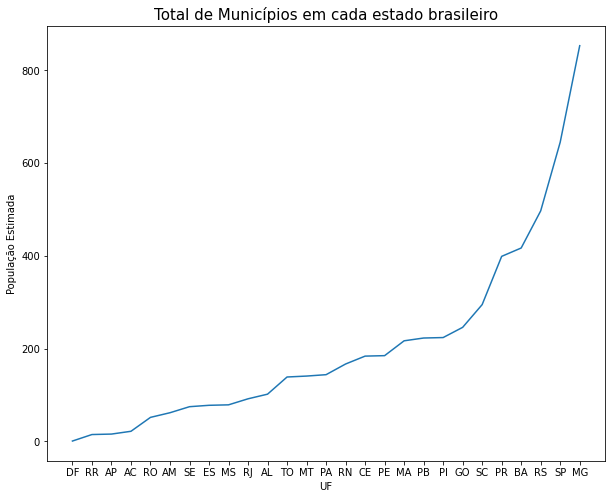

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title( "Total de Municípios em cada estado brasileiro" , size = 15 )

plot = sns.lineplot(data = uf_contagem, ax=ax)

### Agora vamos achar apenas os municípios com pelo menos 1 milhão de habitantes.

In [9]:
pop_milhao = df[df['População Estimada'] > 1000000].set_index('UF').sort_values(by = 'População Estimada', 
                                                                                ascending=False)
pop_milhao

,Nome do Município,População Estimada
UF,,
SP,São Paulo,12396372
RJ,Rio de Janeiro,6775561
DF,Brasília,3094325
BA,Salvador,2900319
CE,Fortaleza,2703391
MG,Belo Horizonte,2530701
AM,Manaus,2255903
PR,Curitiba,1963726
PE,Recife,1661017


##### Apenas 17 municípios brasileiros possuem mais de 1 milhão de habitantes.

In [10]:
pop_milhao_contagem = pop_milhao.groupby('UF')['População Estimada'].count().sort_values()
pop_milhao_contagem

UF
AL    1
AM    1
BA    1
CE    1
DF    1
GO    1
MA    1
MG    1
PA    1
PE    1
PR    1
RS    1
RJ    2
SP    3
Name: População Estimada, dtype: int64

##### Apenas 14 estados brasileiros possuem pelo menos um municípios com mais de 1 milhão de habitantes. Apenas são paulo e rio de janeiro possuem mais de um sendo são paulo com 3 municípios com mais de 1 milhão de habitantes e rio de janeiro com mais de 1 milhão de habitantes.

### Agora vou fazer algumas breves análises da população do estado do maranhão.

In [11]:
df_MA = df[df['UF'] == 'MA'].set_index('UF')

In [12]:
ma_top5_maior = pd.DataFrame(df_MA).sort_values(by = 'População Estimada', ascending=False).head(5)

ma_top5_maior

,Nome do Município,População Estimada
UF,,
MA,São Luís,1115932
MA,Imperatriz,259980
MA,São José de Ribamar,180345
MA,Timon,171317
MA,Caxias,166159


##### Podemos ver que no top 5 de maiores populações do maranhão são luís lidera com aproximadamente 1,1 milhões de habitantes sendo o único município do maranhão com mais de 1 milhão de habitantes.

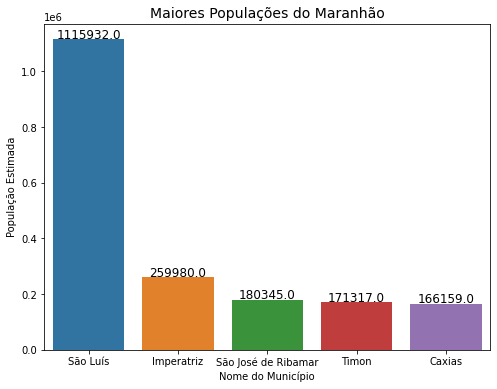

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title( "Maiores Populações do Maranhão" , size = 14 )

plot = sns.barplot(x = 'Nome do Município', y = 'População Estimada', data = ma_top5_maior, ax=ax)

for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x() + i.get_width() / 2, i.get_height()),
                 ha='center', va='baseline', fontsize=12,
                 color='black', xytext=(0, 1),
                 textcoords='offset points')

plt.show()

In [14]:
ma_top5_menor = pd.DataFrame(df_MA).sort_values(by = 'População Estimada', ascending=True).head()
ma_top5_menor

,Nome do Município,População Estimada
UF,,
MA,Junco do Maranhão,4334
MA,São Félix de Balsas,4540
MA,Nova Iorque,4682
MA,São Pedro dos Crentes,4700
MA,São Raimundo do Doca Bezerra,5028


##### Podemos ver que o top 5 de menores populações do maranhão e liderada por junco do maranhão com apenas 4334 habitantes.

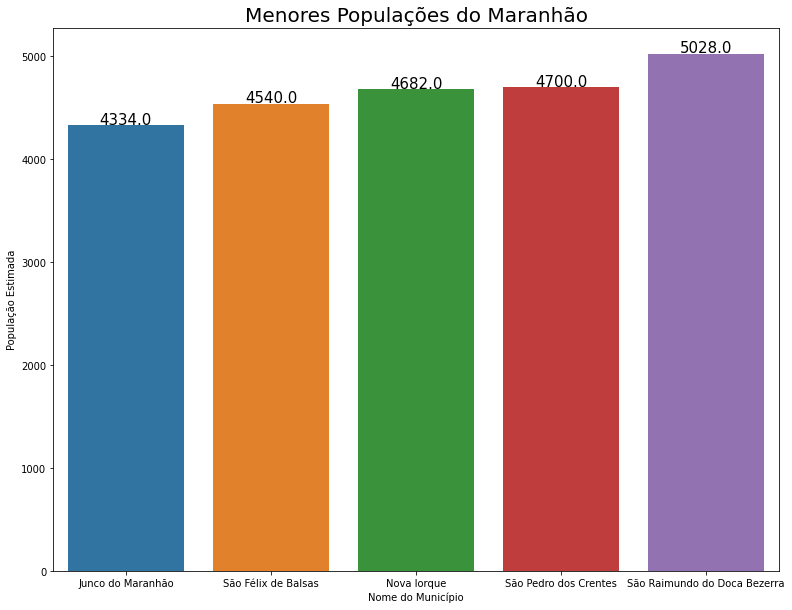

In [15]:
fig, ax = plt.subplots(figsize=(13, 10))

ax.set_title( "Menores Populações do Maranhão" , size = 20 )

plot = sns.barplot(x = 'Nome do Município', y = 'População Estimada', data = ma_top5_menor, ax=ax)

for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x() + i.get_width() / 2, i.get_height()),
                 ha='center', va='baseline', fontsize=15,
                 color='black', xytext=(0, 1),
                 textcoords='offset points')
 
plt.show()